# Kaggle classification competition 2024

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
data = pd.read_csv("/kaggle/input/predicting-dropout-and-success-rate-dataset-by-ics/Grad_data.csv", delimiter = ';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Converting String into integers

In [3]:
print(data['Target'].unique())

['Dropout' 'Graduate' 'Enrolled']


In [4]:
enrolled = data["Target"].value_counts().get('Enrolled', 0)
drop = data["Target"].value_counts().get("Dropout", 0)
grad = data["Target"].value_counts().get("Graduate", 0)

print("Enrolled", enrolled)
print("Dropout", drop)
print("Graduate", grad)

Enrolled 794
Dropout 1421
Graduate 2209


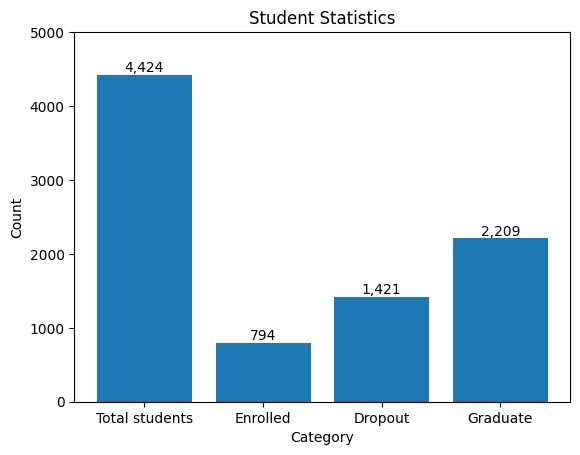

In [5]:
category = ["Total students", "Enrolled", "Dropout", "Graduate"]
counts = [4424, 794, 1421, 2209]

fig, ax = plt.subplots()
bar_container = ax.bar(category, counts)
ax.set(xlabel = "Category", ylabel = "Count",title = "Student Statistics", ylim=(0, 5000))
ax.bar_label(bar_container, fmt = '{:,.0f}')
plt.show()

In [6]:
target_mapping = {'Dropout' : 0, 'Graduate' : 1, 'Enrolled' : 2} 
data['Target'] = data['Target'].map(target_mapping)

data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [7]:
# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Replace any tab characters in the column names
data.columns = data.columns.str.replace('\t', ' ')

# Display the cleaned column names
print(data.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [8]:
corr_all = data.corr()
corr_all

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.074310
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,-0.116928
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.027393
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,0.024210
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.066439
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,-0.027984
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,0.025096
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,0.002098
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657,-0.075941
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610,-0.035183


In [9]:
columns_to_keep = ["Course", "Mother's occupation", "Father's occupation", "Tuition fees up to date", 
                   "Displaced" ,"Scholarship holder" , "Daytime/evening attendance",
                   "International" , "Curricular units 1st sem (enrolled)",
                   "Curricular units 1st sem (grade)", "Curricular units 1st sem (evaluations)",
                   "Curricular units 1st sem (approved)",
                   "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (evaluations)",
                   "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (enrolled)",
                   "GDP" ,"Target" ]


data = data[columns_to_keep]
data.head()

,Course,Mother's occupation,Father's occupation,Tuition fees up to date,Displaced,Scholarship holder,Daytime/evening attendance,International,Curricular units 1st sem (enrolled),Curricular units 1st sem (grade),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (enrolled),GDP,Target
0,171,5,9,1,1,0,1,0,0,0.000000,0,0,0.000000,0,0,0,1.74,0
1,9254,3,3,0,1,0,1,0,6,14.000000,6,6,13.666667,6,6,6,0.79,1
2,9070,9,9,0,1,0,1,0,6,0.000000,0,0,0.000000,0,0,6,1.74,0
3,9773,5,3,1,1,0,1,0,6,13.428571,8,6,12.400000,10,5,6,-3.12,1
4,8014,9,9,1,0,0,0,0,6,12.333333,9,5,13.000000,6,6,6,0.79,1


In [10]:
corr = data.corr()
corr

,Course,Mother's occupation,Father's occupation,Tuition fees up to date,Displaced,Scholarship holder,Daytime/evening attendance,International,Curricular units 1st sem (enrolled),Curricular units 1st sem (grade),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (enrolled),GDP,Target
Course,1.000000,0.031265,0.028881,0.018381,-0.087399,0.017138,-0.043151,-0.026737,0.328461,0.389349,0.272845,0.180500,0.348728,0.278797,0.198032,0.401539,-0.020265,0.024210
Mother's occupation,0.031265,1.000000,0.910472,-0.005798,-0.051725,-0.021151,-0.019067,0.043926,0.003560,-0.018015,0.015385,-0.021567,-0.020724,0.000633,-0.031861,-0.006512,0.124268,0.051664
Father's occupation,0.028881,0.910472,1.000000,0.004611,-0.048719,-0.017800,-0.015477,0.021346,-0.004582,-0.010538,0.006084,-0.019138,-0.016424,-0.004087,-0.030411,-0.014098,0.131767,0.051455
Tuition fees up to date,0.018381,-0.005798,0.004611,1.000000,0.096027,0.137421,0.038799,-0.044202,0.058721,0.250394,0.027514,0.239347,0.296480,0.063482,0.291921,0.085918,-0.002768,0.342121
Displaced,-0.087399,-0.051725,-0.048719,0.096027,1.000000,0.072887,0.251767,-0.009687,-0.063812,0.064815,-0.077665,0.047682,0.069087,-0.038839,0.063698,-0.041823,0.062875,0.070649
Scholarship holder,0.017138,-0.021151,-0.017800,0.137421,0.072887,1.000000,0.093912,-0.027972,-0.004927,0.168324,-0.063429,0.153772,0.181227,-0.021410,0.202704,0.026416,0.035650,0.114517
Daytime/evening attendance,-0.043151,-0.019067,-0.015477,0.038799,0.251767,0.093912,1.000000,0.027973,-0.043056,0.063974,-0.045889,0.016935,0.050493,0.014610,0.034022,0.000371,0.022929,0.066439
International,-0.026737,0.043926,0.021346,-0.044202,-0.009687,-0.027972,0.027973,1.000000,0.001310,0.006314,0.012543,0.005290,0.001460,-0.004399,-0.010565,-0.013577,0.044389,0.015893
Curricular units 1st sem (enrolled),0.328461,0.003560,-0.004582,0.058721,-0.063812,-0.004927,-0.043056,0.001310,1.000000,0.376996,0.680220,0.769083,0.361959,0.599567,0.673341,0.942627,-0.026262,0.052020
Curricular units 1st sem (grade),0.389349,-0.018015,-0.010538,0.250394,0.064815,0.168324,0.063974,0.006314,0.376996,1.000000,0.418038,0.696113,0.837170,0.487236,0.673335,0.406167,0.054801,0.349652


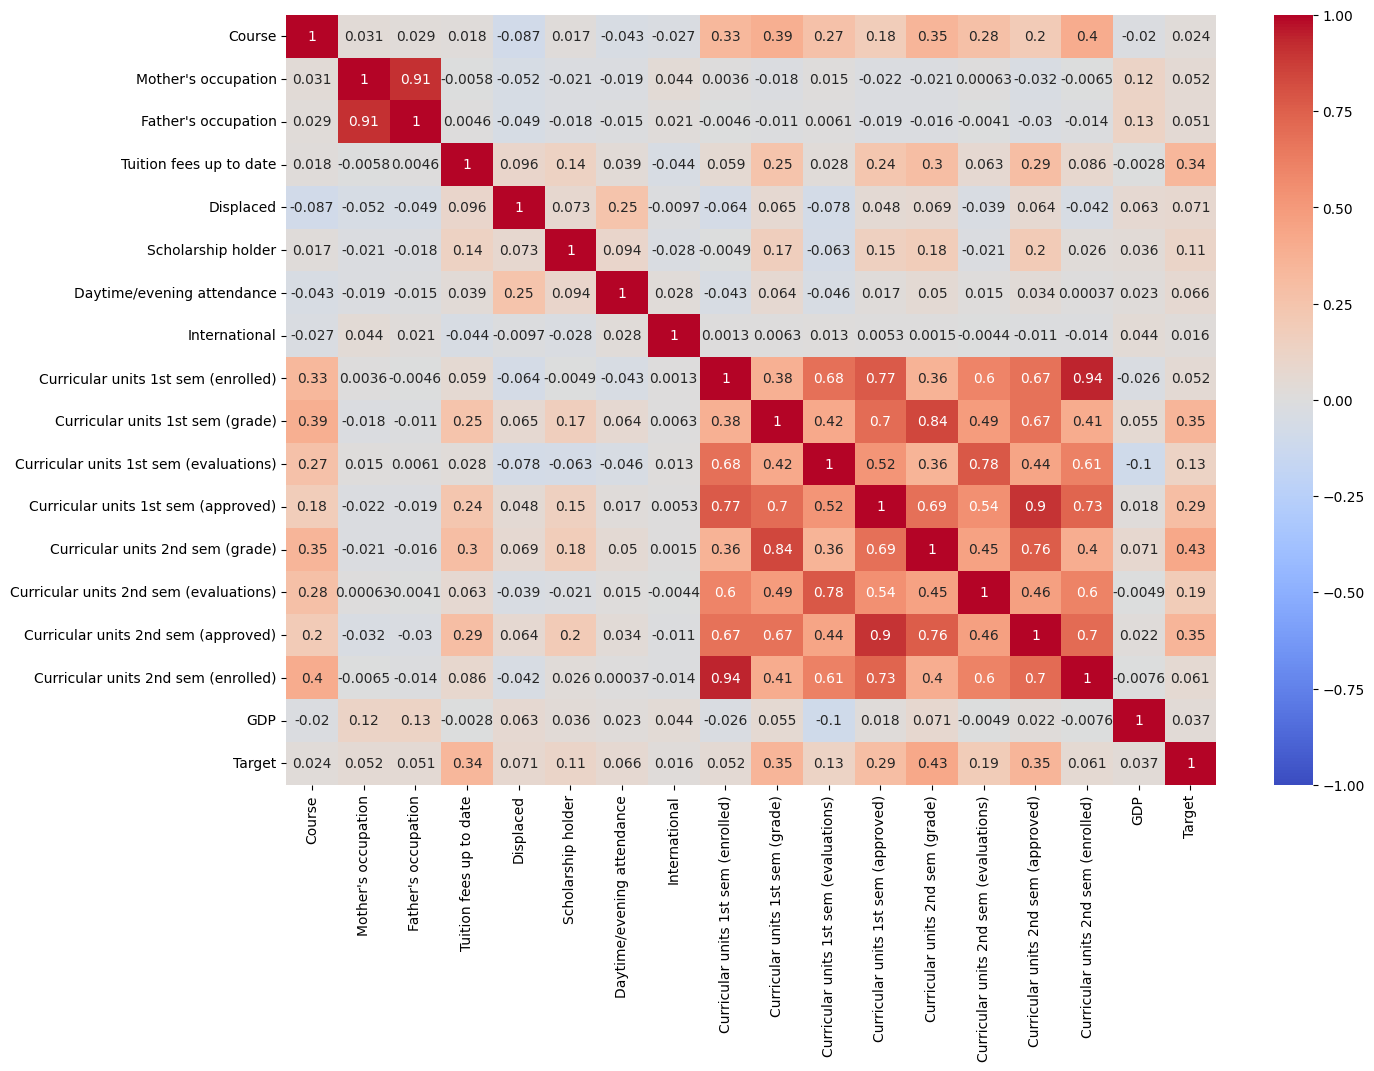

In [11]:
corr = data.corr()

plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize =(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin = -1, vmax = 1)
plt.show()

In [12]:
filtered_data = data[columns_to_keep]
filtered_data = filtered_data.dropna()

In [13]:
filtered_data.head()

,Course,Mother's occupation,Father's occupation,Tuition fees up to date,Displaced,Scholarship holder,Daytime/evening attendance,International,Curricular units 1st sem (enrolled),Curricular units 1st sem (grade),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (enrolled),GDP,Target
0,171,5,9,1,1,0,1,0,0,0.000000,0,0,0.000000,0,0,0,1.74,0
1,9254,3,3,0,1,0,1,0,6,14.000000,6,6,13.666667,6,6,6,0.79,1
2,9070,9,9,0,1,0,1,0,6,0.000000,0,0,0.000000,0,0,6,1.74,0
3,9773,5,3,1,1,0,1,0,6,13.428571,8,6,12.400000,10,5,6,-3.12,1
4,8014,9,9,1,0,0,0,0,6,12.333333,9,5,13.000000,6,6,6,0.79,1


In [14]:
print(filtered_data['Target'].isna().sum())

0


In [15]:
print(filtered_data['Target'].unique())

[0 1 2]


## RandomforestClassifier

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


filtered_data = filtered_data.dropna()

print(filtered_data['Target'].unique())

X = filtered_data.drop('Target', axis=1)
y = filtered_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classy = RandomForestClassifier(n_estimators=100, random_state=42)
classy.fit(X_train, y_train)

y_pred = classy.predict(X_test)

# Evaluate the classifier
rfc_accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate', 'Enrolled'])

print(f'Accuracy: {rfc_accuracy*100}')
print('Classification Report:')
print(report)

[0 1 2]
Accuracy: 75.59322033898304
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.83      0.74      0.78       316
    Graduate       0.78      0.91      0.84       418
    Enrolled       0.48      0.36      0.41       151

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



## Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2 ,random_state = 42)

logi = LogisticRegression(max_iter=1000)

logi.fit(X_scaled_train, y_train)
logi_pred = logi.predict(X_scaled_test)
lr_accuracy = accuracy_score(y_test, logi_pred)
print('Logistic Regression Accuracy:', lr_accuracy*100)
#print(classification_report(y_test, logi_pred, target_names=['Dropout', 'Graduate', 'Enrolled']))

Logistic Regression Accuracy: 74.35028248587571


## Gradient Boosting Classifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gdc_accuracy = accuracy_score(y_test, gbc_pred)
print("Gradient Boosting Classifier:", gdc_accuracy*100)

Gradient Boosting Classifier: 74.01129943502825


Accuarcy Score

In [19]:
print('RandomForestClassifier:', rfc_accuracy*100)
print('Logistic Regression Accuracy:', lr_accuracy*100)
print("Gradient Boosting Classifier:", gdc_accuracy*100)

RandomForestClassifier: 75.59322033898304
Logistic Regression Accuracy: 74.35028248587571
Gradient Boosting Classifier: 74.01129943502825
